# PYCTDPROC: Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
import pyctdproc as ctd

plt.ion()

%config InlineBackend.figure_format = 'retina'

xr.set_options(display_style="text");

In [2]:
pd.options.display.html.table_schema = True

Path to example CTD file in .hex format. The corresponding xmlcon file needs to be in the same directory.

In [3]:
hexfile = Path('../pyctdproc/tests/data/BLT_Test_001.hex')

Convert hex file

In [4]:
c = ctd.io.CTD(hexfile)

Display parameters as read from xmlcon file. The parameters come in a `pandas.DataFrame`.

In [5]:
c.cfgp.transpose()

,@index,@SensorID,cal
TemperatureSensor1,0,55,"{'@SensorID': '55', 'SerialNumber': '2322', 'C..."
ConductivitySensor1,1,3,"{'@SensorID': '3', 'SerialNumber': '2569', 'Ca..."
PressureSensor,2,45,"{'@SensorID': '45', 'SerialNumber': '1316', 'C..."
TemperatureSensor2,3,55,"{'@SensorID': '55', 'SerialNumber': '6142', 'C..."
ConductivitySensor2,4,3,"{'@SensorID': '3', 'SerialNumber': '3207', 'Ca..."
FluoroSeapointSensor,5,11,"{'@SensorID': '11', 'SerialNumber': 'SCF2956',..."
PAR_BiosphericalLicorChelseaSensor,6,42,"{'@SensorID': '42', 'SerialNumber': '4542', 'C..."
WET_LabsCStar,7,71,"{'@SensorID': '71', 'SerialNumber': 'CST-1874D..."
AltimeterSensor,9,0,"{'@SensorID': '0', 'SerialNumber': 'N/A', 'Cal..."
OxygenSensor,11,38,"{'@SensorID': '38', 'SerialNumber': '0255', 'C..."


Convert the data to an `xarray.Dataset`.

In [6]:
cx = c.to_xarray()

Display the Dataset.

In [7]:
cx

<xarray.Dataset>
Dimensions:   (time: 120643)
Coordinates:
  * time      (time) datetime64[ns] 2019-11-06T18:20:31.999996 ... 2019-11-06T19:44:18.000003
Data variables:
    lon       (time) float64 -117.5 -117.5 -117.5 ... -117.5 -117.5 -117.5
    lat       (time) float64 32.62 32.62 32.62 32.62 ... 32.62 32.62 32.62 32.62
    p         (time) float64 12.26 12.29 12.32 12.26 ... 11.74 11.71 11.69 11.69
    t1        (time) float64 17.76 17.79 17.83 17.88 ... 18.49 18.48 18.47 18.46
    t2        (time) float64 17.96 17.95 17.95 17.94 ... 18.5 18.51 18.52 18.52
    c1        (time) float64 4.406 4.41 4.415 4.421 ... 4.478 4.477 4.475 4.475
    c2        (time) float64 4.421 4.422 4.421 4.42 ... 4.481 4.482 4.482 4.482
    alt       (time) float64 74.73 74.73 74.73 74.73 ... 74.58 74.58 74.58 74.58
    fl        (time) float64 0.1062 0.1074 0.1074 ... 0.0293 0.0293 0.03053
    trans     (time) float64 92.04 92.04 92.04 92.04 ... 96.79 96.79 96.79 96.79
    par       (time) float64 1.175e+03 1.178e+03 ... 4.531e+03 4.531e+03
    modcount  (time) int64 63 64 65 66 67 68 69 ... 123 124 125 126 127 128 129

Save time series to netcdf.

In [8]:
cx.to_netcdf('test.nc')

Save time series as Matlab file.

In [9]:
c.to_mat('./test.mat')

Plot time series from temperature sensor 1

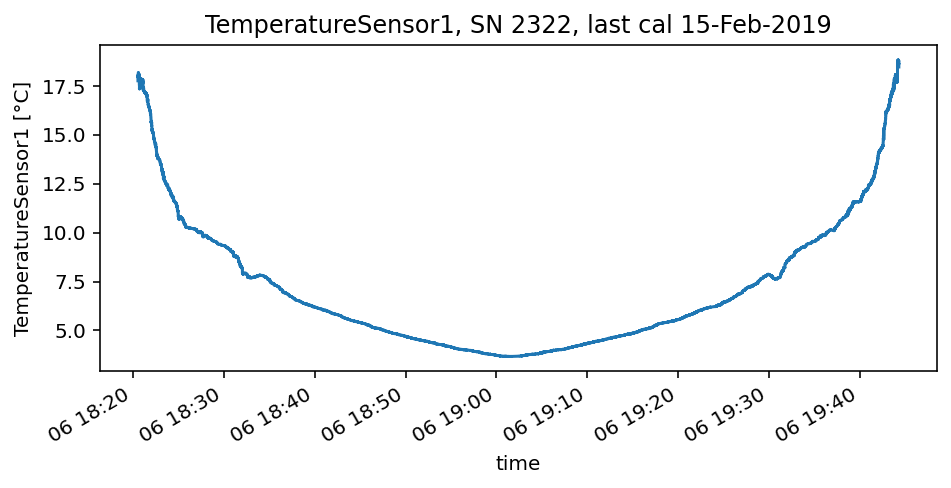

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 3))
cx.t1.plot(ax=ax)
ax.set(
    title="{}, SN {}, last cal {}".format(
        cx.t1.attrs["long_name"], cx.t1.attrs["SN"], cx.t1.attrs["CalDate"]
    )
);

Plot more time series. Adjust automatic axis labels to fit everything.

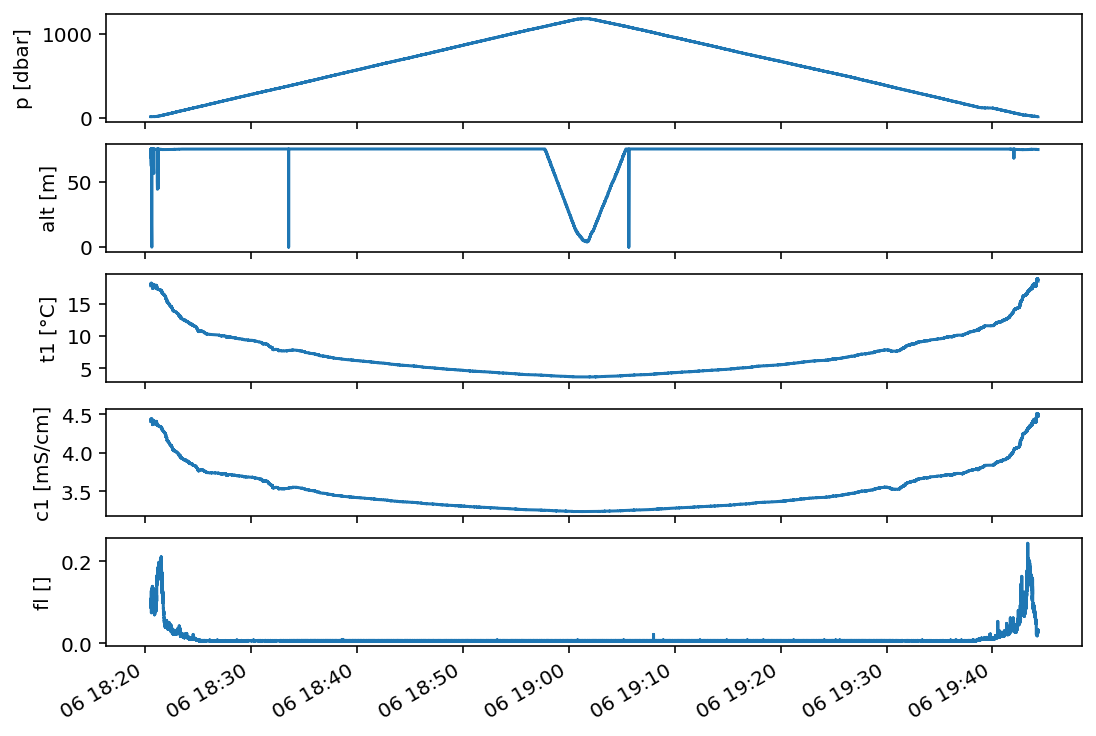

In [11]:
plot_vars = ["p", "alt", "t1", "c1", "fl"]
fig, ax = plt.subplots(
    nrows=len(plot_vars),
    ncols=1,
    figsize=(7.5, 5),
    constrained_layout=True,
    sharex=True,
)
for axi, vi in zip(ax, plot_vars):

    cx[vi].plot(ax=axi)
    axi.set(ylabel="{:s} [{:s}]".format(vi, cx[vi].attrs["units"]), xlabel="")

Plot location data.

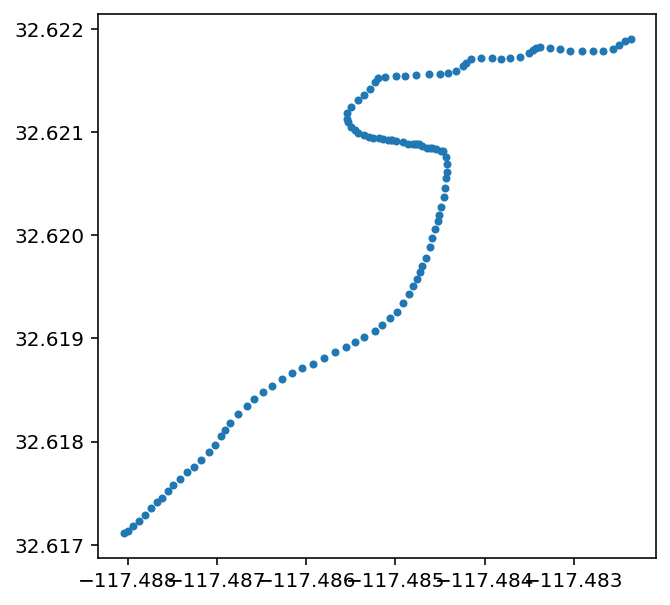

In [12]:
cxc = cx.coarsen(time=1000, boundary='trim').mean()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(cxc.lon, cxc.lat, marker='.', linestyle='');

Run further processing steps on the time series.

In [13]:
datad, datau = ctd.proc.run_all(cx)

1: tau = 0.0444s, lag = -0.0008s
2: tau = 0.0726s, lag = -0.0083s
1: tau = 0.0506s, lag = -0.0052s
2: tau = 0.0748s, lag = -0.0078s
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start
interpbadsegments: bad at istart - no interpolation at start


Depth binning.

In [14]:
dz = 1
zmin = 10
zmax = np.ceil(datad.depth.max().data)
datad = ctd.proc.ctd_bincast(datad, dz, zmin, zmax)
datau = ctd.proc.ctd_bincast(datau, dz, zmin, zmax)

Final data structure.

In [15]:
datad

<xarray.Dataset>
Dimensions:  (z: 1166)
Coordinates:
    depth    (z) float64 10.0 11.0 12.0 13.0 ... 1.173e+03 1.174e+03 1.175e+03
    lon      (z) float64 nan nan -117.5 -117.5 ... -117.5 -117.5 -117.5 nan
    lat      (z) float64 nan nan 32.62 32.62 32.62 ... 32.62 32.62 32.62 nan
    time     (z) datetime64[ns] NaT NaT ... 2019-11-06T19:01:17.222221333 NaT
Dimensions without coordinates: z
Data variables:
    t1       (z) float64 nan nan 17.76 17.73 17.4 ... 3.676 3.674 3.673 nan
    t2       (z) float64 nan nan 17.8 17.72 17.42 ... 3.677 3.676 3.675 nan
    c1       (z) float64 nan nan 4.402 4.4 4.37 ... 3.237 3.237 3.237 3.237 nan
    c2       (z) float64 nan nan 4.406 4.399 4.372 ... 3.238 3.237 3.237 nan
    p        (z) float64 nan nan 12.09 13.09 ... 1.185e+03 1.186e+03 nan
    trans    (z) float64 nan nan 93.57 93.28 91.19 ... 102.1 102.1 102.1 nan
    fl       (z) float64 nan nan 0.08998 0.1039 ... 0.006667 0.0064 0.006548 nan
    par      (z) float64 nan nan 1.096e+03 976.4 ... -0.0149 -0.0149 nan
    alt      (z) float64 nan nan 74.75 74.76 74.79 ... 7.311 6.692 5.889 nan
    SA1      (z) float64 nan nan 33.75 33.75 33.77 ... 34.68 34.68 34.68 nan
    SA2      (z) float64 nan nan 33.76 33.76 33.78 ... 34.69 34.69 34.69 nan
    s1       (z) float64 nan nan 33.59 33.6 33.61 ... 34.5 34.5 34.5 34.5 nan
    s2       (z) float64 nan nan 33.6 33.6 33.62 ... 34.51 34.51 34.51 34.51 nan
    CT1      (z) float64 nan nan 17.83 17.76 17.43 ... 3.59 3.59 3.587 3.587 nan
    CT2      (z) float64 nan nan 17.86 17.74 17.45 ... 3.591 3.59 3.588 nan
    th1      (z) float64 nan nan 17.79 17.69 17.4 ... 3.587 3.585 3.585 nan
    th2      (z) float64 nan nan 17.81 17.69 17.42 ... 3.589 3.588 3.586 nan
    sg1      (z) float64 nan nan 24.25 24.27 24.36 ... 27.45 27.45 27.45 nan
    sg2      (z) float64 nan nan 24.24 24.28 24.36 ... 27.45 27.45 27.45 nan
Attributes:
    tau1:     0.044394512423089824
    tau2:     0.07260763818171392
    L1:       -0.0008168643385431199
    L2:       -0.008339279456313653

Plot potential density anomaly profile and its difference between the two sensors.

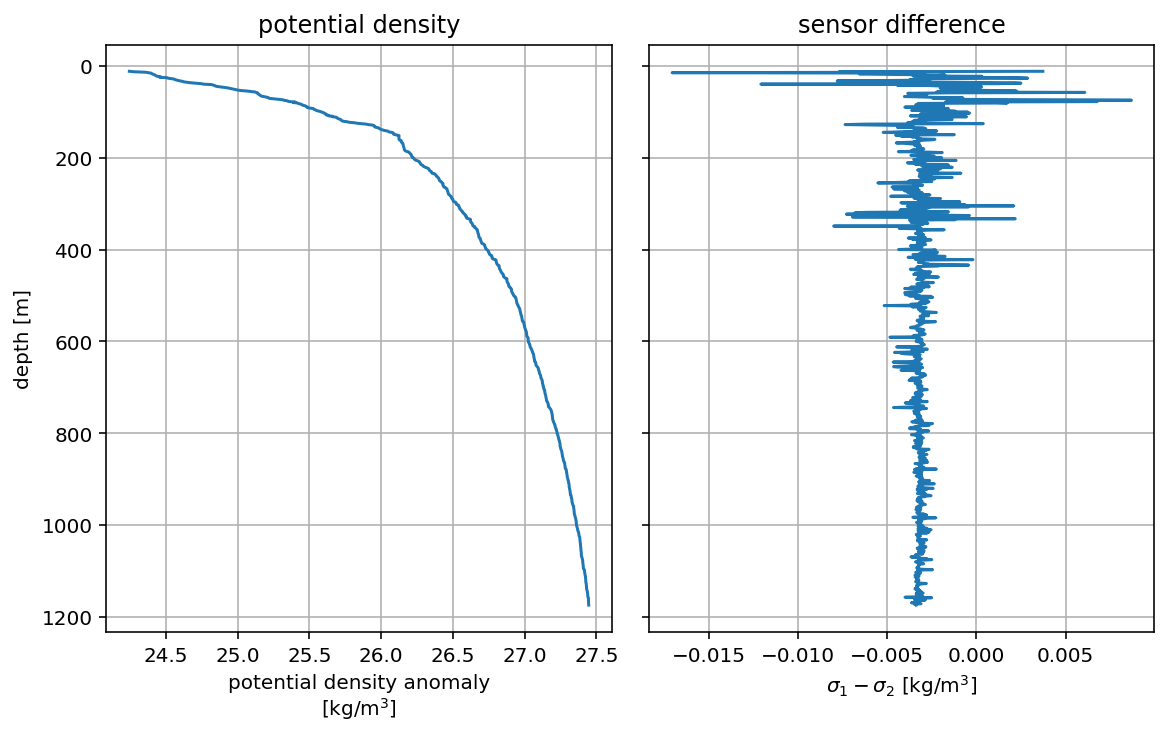

In [16]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(8, 5), constrained_layout=True, sharey=True
)
datad.sg1.plot(y="depth", yincrease=False, ax=ax[0])
ax[0].set(title="potential density")
(datad.sg1 - datad.sg2).plot(y="depth", yincrease=False, ax=ax[1])
ax[1].set(title="sensor difference", ylabel="", xlabel="$\sigma_1-\sigma_2$ [kg/m$^3$]")
for axi in ax:
    axi.grid(True)